In [45]:
# coding=utf-8
from scapy.all import *
import binascii
import struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether


import sys
sys.path.append('/home/xalanaseon/scapy-cip-enip')
# insert at 1, 0 is the script path (or '' in REPL)
#sys.path.insert(1, '/home/xalanaseon/scapy-cip-enip')
from cip import CIP, CIP_Path
import cip
import numpy as np

cube = []
seq = []

### Convert ip address string to integer
def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if IP in pkt and TCP in pkt:
        #if len(pkt[TCP].payload) > 6:
        #print(pkt[CIP].SERVICE_CODES[pkt[CIP].service])
        #pkt.show()
        if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
            d_time = float(str(pkt.time))
            s_ip = ip2long(pkt[IP].src)
            d_ip = ip2long(pkt[IP].dst)
            #seq.append(pkt[TCP].seq)
            cube.append(np.asarray([s_ip,d_ip,d_time]))
            #cube.append(np.asarray([s_ip,d_ip,d_time,pkt[CIP].service]))

In [46]:
try:
    sniff(offline='DataSet/Dec2019_00000_20191206100500.pcap', prn=packet_analysis, store=0, count=100000, filter="src host 192.168.1.10 and dst host 192.168.1.20")
    cube = np.asarray(cube)
    print('Normal benchmark is Completed')
    
except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Normal benchmark is Completed


In [47]:
#print(CIP.SERVICE_CODES)
#nrm_data = nrm_cube[nrm_cube[:,3]==[77]]
ds1 = cube[cube[:,0]==[ip2long('192.168.1.10')]]
ds2 = ds1[ds1[:,1]==[ip2long('192.168.1.20')]]
nrm_data = ds2[:,2]
print(nrm_data.shape)
print("Sliding Windows Timespan (Normal) :",max(nrm_data)-min(nrm_data))
nrm_diff = np.diff(nrm_data)

(8340,)
Sliding Windows Timespan (Normal) : 16.879909992218018


In [48]:
# coding=utf-8
from scapy.all import *
import binascii
import struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether


import sys
sys.path.append('/home/xalanaseon/scapy-cip-enip')
# insert at 1, 0 is the script path (or '' in REPL)
#sys.path.insert(1, '/home/xalanaseon/scapy-cip-enip')
from cip import CIP, CIP_Path
import cip
import numpy as np

cube = []
seq = []

### Convert ip address string to integer
def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if IP in pkt and TCP in pkt:
        #if len(pkt[TCP].payload) > 6:
        #print(pkt[CIP].SERVICE_CODES[pkt[CIP].service])
        #pkt.show()
        if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
            d_time = float(str(pkt.time))
            s_ip = ip2long(pkt[IP].src)
            d_ip = ip2long(pkt[IP].dst)
            #seq.append(pkt[TCP].seq)
            cube.append(np.asarray([s_ip,d_ip,d_time]))
            #cube.append(np.asarray([s_ip,d_ip,d_time,pkt[CIP].service]))

In [49]:
try:
    sniff(offline='DataSet/Dex2019_0002_attack4.pcap', prn=packet_analysis, store=0, count=100000, filter="src host 192.168.1.10 and dst host 192.168.1.20")
    cube = np.asarray(cube)
    print('Attacked benchmark is Completed')
    
except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Attacked benchmark is Completed


In [50]:
#diff attack

In [51]:
#print(CIP.SERVICE_CODES)
#atk_data = atk_cube[atk_cube[:,3]==[77]]
ds1 = cube[cube[:,0]==[ip2long('192.168.1.10')]]
ds2 = ds1[ds1[:,1]==[ip2long('192.168.1.20')]]
atk_data = ds2[:,2]
print(atk_data.shape)
print("Sliding Windows Timespan (Attacked) :",max(atk_data)-min(atk_data))
atk_diff = np.diff(atk_data)

(8317,)
Sliding Windows Timespan (Attacked) : 17.108327865600586


In [52]:
print("normal HMI",nrm_data.shape)
print("attack HMI",atk_data.shape)
print("normal HMI",nrm_diff.shape)
print("attack HMI",atk_diff.shape)

normal HMI (8340,)
attack HMI (8317,)
normal HMI (8339,)
attack HMI (8316,)


In [53]:
#diff attack

2000.0
[43.33333333  6.66666667  5.          4.33333333  4.66666667  9.
  6.          1.66666667  3.66666667  2.33333333  5.66666667  1.66666667
  0.          1.66666667  1.33333333  1.          0.66666667  0.66666667
  0.33333333  0.          0.          0.          0.33333333  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  

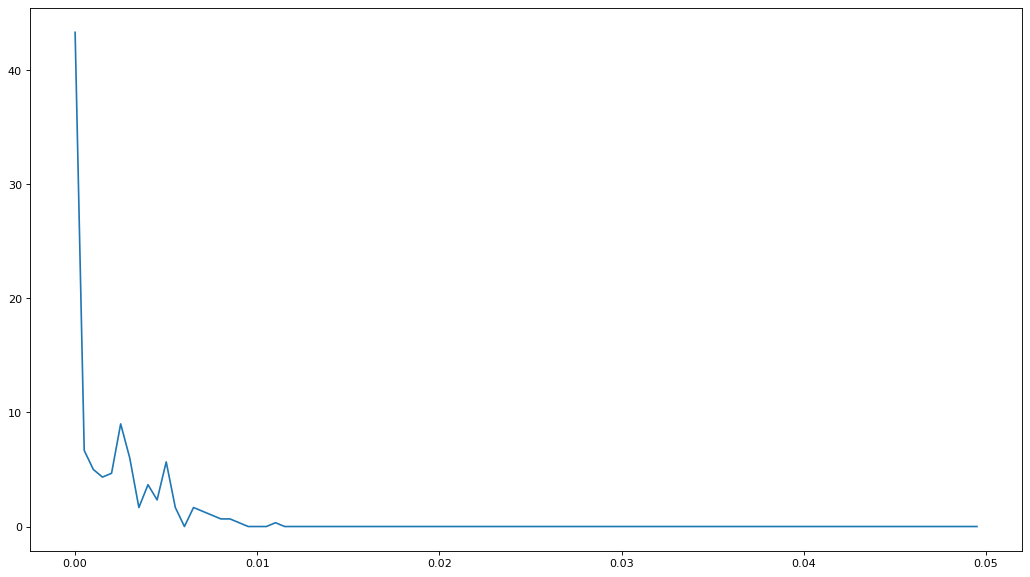

In [54]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

maxrange = 0.05

data = atk_diff[:300]
hist, bin_edges = np.histogram(data, bins=100, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
prob = hist[:]*maxrange
print(sum(hist))
#print(max(prob))
print(prob)
print(np.sum(prob))
mat = np.vstack((prob,bin_edges))

plt.plot(bin_edges,prob)

1.0000000000000004
1.0
normal peaks [0.40898455 0.10564779 0.01628583 0.00140272]
normal valleys [0.05462013 0.00782072 0.00136929]
attack peaks [0.3847667  0.07796375 0.10226223 0.01353767 0.00152157]
attack valleys [0.06867781 0.07748957 0.01055005 0.00010844]
relative [1.06294164 1.35508863 0.15925555]
relative [0.79530972 0.10092616 0.12979023]


(-0.02, 0.3)

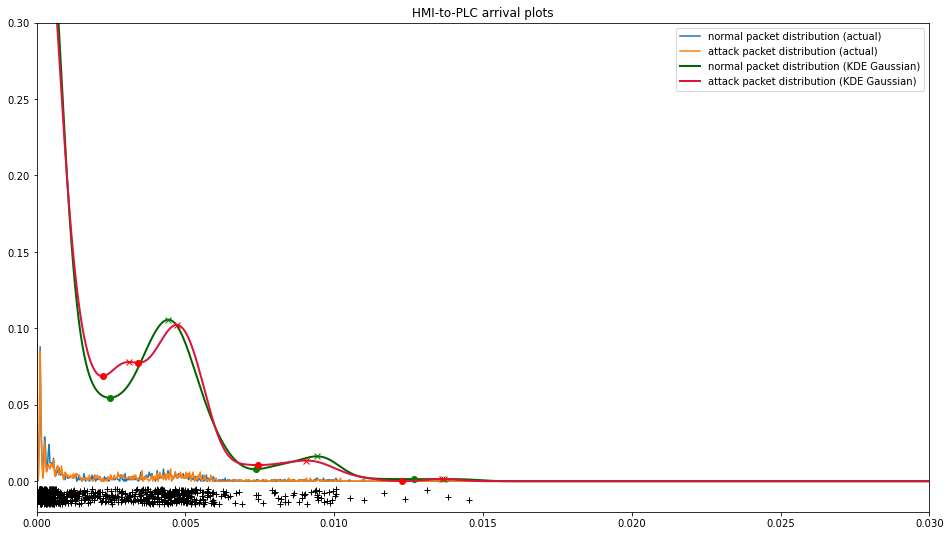

In [55]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example

maxrange = 0.03
N = 1000
np.random.seed(1)
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = nrm_diff[:N].reshape(-1,1)
X_beta = atk_diff[:N].reshape(-1,1)
X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

#true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
#             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

hist, bin_edges = np.histogram(nrm_diff[:N], bins=N, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
true_dens = hist[:]*maxrange*(1/N)
#print(true_dens)
print(np.sum(true_dens))

_hist, _bin_edges = np.histogram(atk_diff[:N], bins=N, range=(0.0,maxrange), density=True)
_bin_edges = _bin_edges[:-1]
_true_dens = _hist[:]*maxrange*(1/N)
#print(_true_dens)
print(np.sum(_true_dens))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_plot[:, 0], true_dens,label='normal packet distribution (actual)')
ax.plot(X_plot[:, 0], _true_dens,label='attack packet distribution (actual)')

kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
log_dens = kde.score_samples(X_plot)
dens = np.exp(log_dens)/1000
peaks, _ = find_peaks(dens, height=0.001)

valleys, _ = find_peaks(1-dens, height=0.001)

_kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
_log_dens = _kde.score_samples(X_plot)
_dens = np.exp(_log_dens)/1000
_peaks, __ = find_peaks(_dens, height=0.001)

_valleys, __ = find_peaks(1-_dens, height=0.001)

ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
        linestyle='-', label='normal packet distribution (KDE Gaussian)')
ax.plot(X_plot[peaks],dens[peaks], "gx")
ax.plot(X_plot[valleys],dens[valleys], "go")
ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
        linestyle='-', label='attack packet distribution (KDE Gaussian)')
ax.plot(X_plot[_peaks],_dens[_peaks], "rx")
ax.plot(X_plot[_valleys],_dens[_valleys], "ro")
print("normal peaks",dens[peaks])
print("normal valleys",dens[valleys])
print("attack peaks",_dens[_peaks])
print("attack valleys",_dens[_valleys])
ax.title.set_text("HMI-to-PLC arrival plots")
print("relative",dens[peaks][:3]/_dens[_peaks][:3])
print("relative",dens[valleys][:3]/_dens[_valleys][:3])
#ax.text(6, 0.38, "N={0} points".format(N))
ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.0, maxrange)
ax.set_ylim(-0.02, 0.3)
